# Unit 3 - Iterative Methods
## Conjugate Gradient and Gauss-Seidel

In [1]:
# Import modules
import MyFunc
import numpy as np
import time
import pandas
import matplotlib.pyplot as plt

# Initialize arrays
A = np.array([[ 3, -2,  1,  0, 0, 1],
              [-2,  4, -2,  1, 0, 0],
              [ 1, -2,  4, -2, 1, 0],
              [ 0,  1, -2,  4,-2, 1],
              [ 0,  0,  1, -2, 4,-2],
              [ 1,  0,  0,  1,-2, 3]], dtype = "float")

b = np.array([[10.0],
              [-8.0],
              [10.0],
              [10.0],
              [-8.0],
              [10.0]], dtype = "float")

# Run function to get accuracies, durations, and solutions for direct methods
Gauss_sol, LU_sol, Cramer_sol, acc_Gauss, acc_LU, acc_Cramer, duration_Gauss, duration_LU, duration_Cramer = MyFunc.matrix_solver(A, b)

# Results of Gauss Elimination
print("\nGauss Elimination:")
print("\nThe solution is:\n",Gauss_sol.flatten())

# Results of LU Decomposition
print("\nLU Decomposition:")
print("\nThe solution is:\n",LU_sol.flatten())

# Results of Cramer's Rule
print("\nCramer's Rule:")
print("\nThe solution is:\n",Cramer_sol.flatten())


x = np.zeros(6) # Create Guesses for solutions

# Run & time gaussSeidel function
start_GS = time.perf_counter()
x, numIter, omega = MyFunc.gaussSeidel(MyFunc.iterEqs_Prob16, x, tol = 1.0e-9)
end_GS = time.perf_counter()
duration_GS = end_GS - start_GS

# Print values
print("\nGauss Seidel (Problem 16):")
print("\nNumber of iterations =",numIter)
print("\nRelaxation factor =",omega)
print("\nThe solution is:\n",x)
acc_GS = MyFunc.accuracy(A, b.flatten(), x) # Compute accuracy of Gauss-Seidel solution


x = np.zeros(6) # Create Guesses for solutions

# Run & time Conjugate Gradient
start_CG = time.perf_counter()
x, numIter_CG = MyFunc.conjGrad(MyFunc.Ax_Prob16, x, b.flatten())
end_CG = time.perf_counter()
duration_CG = end_CG - start_CG

# Print results
print("\nConjugate Gradient(Problem 16):")
print("\nNumber of iterations =",numIter_CG)
print("\nThe solution is:\n",x,"\n")
acc_CG = MyFunc.accuracy(A, b.flatten(), x) # Compute accuracy

# Create headers for table
methods = ["Cramers", "Gauss", "LU Decomposition", "Gauss Seidel", "Conjugate Gradient"] 
headers = ["Residual", "Duration (sec)"]

# Import duration times and accuracy to table
data = np.array([[acc_Cramer, duration_Cramer], 
                 [acc_Gauss, duration_Gauss],
                 [acc_LU, duration_LU],
                 [acc_GS, duration_GS],
                 [acc_CG, duration_CG]])

df = pandas.DataFrame(data, methods, headers)

# Show Table
print(df)





Gauss Elimination:

The solution is:
 [ 1.3 -0.3  4.2  4.2 -0.3  1.3]

LU Decomposition:

The solution is:
 [ 1.3 -0.3  4.2  4.2 -0.3  1.3]

Cramer's Rule:

The solution is:
 [ 1.3 -0.3  4.2  4.2 -0.3  1.3]

Gauss Seidel (Problem 16):

Number of iterations = 34

Relaxation factor = 1.3034931233068194

The solution is:
 [ 1.3 -0.3  4.2  4.2 -0.3  1.3]

Conjugate Gradient(Problem 16):

Number of iterations = 2

The solution is:
 [ 1.3 -0.3  4.2  4.2 -0.3  1.3] 

                        Residual  Duration (sec)
Cramers             2.592507e-14        0.000192
Gauss               0.000000e+00        0.000214
LU Decomposition    0.000000e+00        0.000102
Gauss Seidel        1.166268e-09        0.000510
Conjugate Gradient  5.617334e-15        0.000142


In [2]:
import numpy as np
import MyFunc
import time

# Initialize lists for plotting
durations_GS = []
durations_CG = []
iterations_GS = []
iterations_CG = []
accs_GS = []
accs_CG = []
matrix_size = []

# Run 3 loops for n = 10, 100, 1000
ans = int(input("How many times do you want this program to run? "))

for i in range(ans):
    
    
    print("\nGauss Seidel (Problem 17)\n") # Gauss-Seidel method
    n = eval(input("Number of equations ==> ")) # Prompt user for n
    
    # Make matrix A for Problems 17 & 18
    matrix_size.append(n)
    a = np.zeros([n, n])

    np.fill_diagonal(a, 4)

    for i in range(n):
        a[i-1, i] = -1
        a[i, i-1] = -1

    a[0, n-1] = 1

    a[n-1, 0] = 1
    
    # Create vector b
    b = np.zeros(n)
    b[n-1] = 100.0

    # Create guesses for solutions
    x = np.zeros(n)
    
    # Run & time Gauss-Seidel
    start_GS = time.perf_counter()
    x, numIter_GS, omega = MyFunc.gaussSeidel(MyFunc.iterEqs_Prob17, x, tol = 1.0e-9)
    end_GS = time.perf_counter()
    duration_GS = end_GS - start_GS
    
    # Add values to lists for plotting
    durations_GS.append(duration_GS)
    iterations_GS.append(numIter_GS)
    
    # Print results
    print("\nNumber of iterations =",numIter_GS)
    print("\nRelaxation factor =",omega)
    print("\nComputing Time Required:",duration_GS,"sec")
    acc_GS = MyFunc.accuracy(a, b, x) # Compute accuracy of Gauss-Seidel method
    accs_GS.append(acc_GS) # Add accuracy value to list for plotting
    print("\nAccuracy of solution =",acc_GS,"\n")

    
    # Conjugate Gradient Method
    print("\nConjugate Gradient (Problem 18)")
    
    # Create guesses for solutions
    x1 = np.zeros(n)
    
    # Run & time Conjugate Gradient
    start_CG = time.perf_counter()
    x,numIter_CG = MyFunc.conjGrad(MyFunc.Ax_Prob18, x1, b)
    end_CG = time.perf_counter()
    
    # Add values to lists for plotting
    duration_CG = end_CG - start_CG
    durations_CG.append(duration_CG)
    iterations_CG.append(numIter_CG)
    
    # Print Results
    print("\nNumber of iterations =",numIter_CG)
    print("\nComputing Time Required:",duration_CG,"sec")
    acc_CG = MyFunc.accuracy(a, b, x) # Compute accuracy of Conjugate Gradient method
    accs_CG.append(acc_CG) # Add accuracy value to list for plotting
    print("\nAccuracy of solution =",acc_CG,"\n\n\n")




How many times do you want this program to run? 3

Gauss Seidel (Problem 17)

Number of equations ==> 10

Number of iterations = 20

Relaxation factor = 1.0968547940782973

Computing Time Required: 0.0006339000537991524 sec

Accuracy of solution = 2.1960555456678042e-10 


Conjugate Gradient (Problem 18)

Number of iterations = 4

Computing Time Required: 0.0003545999061316252 sec

Accuracy of solution = 1.512597384598292e-14 




Gauss Seidel (Problem 17)

Number of equations ==> 100

Number of iterations = 21

Relaxation factor = 1.0976799893909892

Computing Time Required: 0.0028984000673517585 sec

Accuracy of solution = 1.9103612759442526e-10 


Conjugate Gradient (Problem 18)

Number of iterations = 19

Computing Time Required: 0.004019300104118884 sec

Accuracy of solution = 5.147117080385458e-10 




Gauss Seidel (Problem 17)

Number of equations ==> 1000

Number of iterations = 21

Relaxation factor = 1.097679989390989

Computing Time Required: 0.024259300087578595 sec

Accura

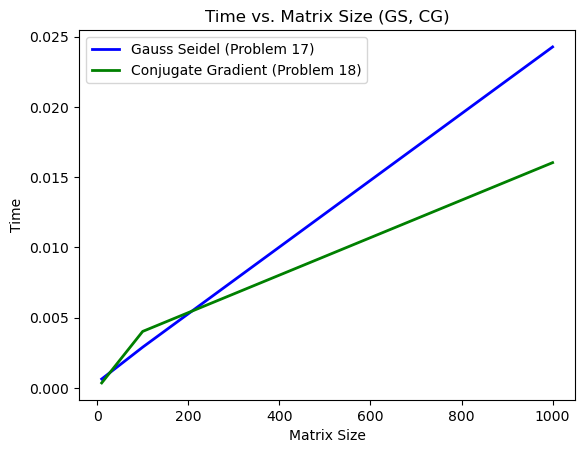

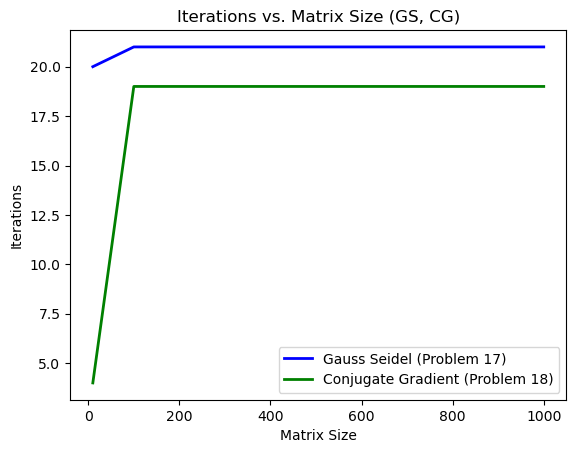

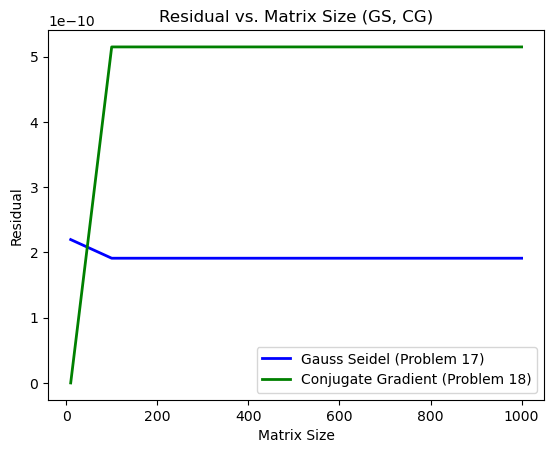

In [3]:
# Plot time vs. matrix size
plt.plot(matrix_size, durations_GS, label='Gauss Seidel (Problem 17)', color='blue', linewidth = 2)
plt.plot(matrix_size, durations_CG, label='Conjugate Gradient (Problem 18)', color='green', linewidth = 2)


# Add legend, titles, and axis labels
plt.legend()
plt.title("Time vs. Matrix Size (GS, CG)")
plt.xlabel("Matrix Size")
plt.ylabel("Time")
plt.show() # Output plot


# Plot iterations vs. matrix size
plt.plot(matrix_size, iterations_GS, label='Gauss Seidel (Problem 17)', color='blue', linewidth = 2)
plt.plot(matrix_size, iterations_CG, label='Conjugate Gradient (Problem 18)', color='green', linewidth = 2)


# Add legend, titles, and axis labels
plt.legend()
plt.title("Iterations vs. Matrix Size (GS, CG)")
plt.xlabel("Matrix Size")
plt.ylabel("Iterations")
plt.show() # Output plot


# Plot accuracy vs. matrix size
plt.plot(matrix_size, accs_GS, label='Gauss Seidel (Problem 17)', color='blue', linewidth = 2)
plt.plot(matrix_size, accs_CG, label='Conjugate Gradient (Problem 18)', color='green', linewidth = 2)


# Add legend, titles, and axis labels
plt.legend()
plt.title("Residual vs. Matrix Size (GS, CG)")
plt.xlabel("Matrix Size")
plt.ylabel("Residual")
plt.show() # Output plot

In [4]:
# Conclusions from data for Problem 17 and 18
print("After running the program multiple times, there were a couple of trends that could be seen from the resulting plots.\nThe Conjugate Gradient method usually computed the solution in less time than the Gauss-Seidel method, and required less\niterations. However, the Gauss-Seidel method was more accurate when solving a large number of equations.")

After running the program multiple times, there were a couple of trends that could be seen from the resulting plots.
The Conjugate Gradient method usually computed the solution in less time than the Gauss-Seidel method, and required less
iterations. However, the Gauss-Seidel method was more accurate when solving a large number of equations.
